# Packages 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as plot
import plotly.graph_objects as go
import plotly.offline as py
import numpy as np 

# Readings

# A description for each one of these sheets is given below:

* orders: it contains the orders that need the calculation of baskets and cold bags. Also, you can see when the order must be delivered and which warehouse received the order.

* order_products: contains what products and how many units of it were on an order from the sheet “orders”.

* store_products: contains information about the storage of the products and a marketing category.

* products: contains information about the products, its dimensions and weight, as well as their names and the can_mix category.


In [2]:

orders = pd.read_excel('dataset.xlsx', sheet_name='orders')

In [3]:
order_products = pd.read_excel('dataset.xlsx', sheet_name='order_products')

In [4]:
store_products = pd.read_excel('dataset.xlsx', sheet_name='store_products')

In [5]:
products = pd.read_excel('dataset.xlsx', sheet_name='products')

# Important Informations

### Calculations

$ {Total volume} = {height} * {width} * {length} $

$ {Cubage} = {Totalvolume} * {weight} $

### The baskets have the following characteristics:
*	Length: 50 centimeters
*	Width: 40 centimeters
*	Height: 60 centimeters

Total weight that it can resit: 25 kilograms


In [6]:
total_volume_baskets = 50 * 40 * 60
cubage_baskets = total_volume_baskets  * (25 * 1000)
cubage_baskets

3000000000

### The cold bags have the following characteristics:
* Length: 23 centimeters
* Width: 37 centimeters
* Height: 18 centimeters

Total weight that it can resit: 5 kilograms


In [7]:
total_volume_coldbag = 23 * 37 * 18 
cubage_coldbag = total_volume_coldbag * (5 * 1000)
cubage_coldbag 

76590000

### A category that determines if the product can be mixed with other products
* Food
* Toilet
* Pets

### A storage type that determines the type of package that will be used for the product
* Dry
* Refrigerated
* Frozen


# Data Analysis.

## Data from Orders

In [8]:
orders.sort_values(['order_id','warehouse_id'], ascending=False)
orders.head(3)

,order_id,warehouse_id,delivery_date,user_id
0,1781559,1,2020-02-01,89718
1,1781560,1,2020-02-02,487283
2,1781561,5,2020-02-02,477993


In [9]:
print(orders.shape)
print()
print(orders.describe())
print()
print(orders.info())

(26308, 4)

           order_id  warehouse_id        user_id
count  2.630800e+04  26308.000000   26308.000000
mean   1.795241e+06      4.023567  507278.641896
std    7.913503e+03      2.475480  232748.593153
min    1.781559e+06      1.000000      12.000000
25%    1.788343e+06      2.000000  306568.500000
50%    1.795236e+06      5.000000  571123.000000
75%    1.802152e+06      6.000000  720586.000000
max    1.808868e+06    124.000000  766206.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26308 entries, 0 to 26307
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       26308 non-null  int64 
 1   warehouse_id   26308 non-null  int64 
 2   delivery_date  26308 non-null  object
 3   user_id        26308 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 822.2+ KB
None


In [10]:
orders.isnull().sum()

order_id         0
warehouse_id     0
delivery_date    0
user_id          0
dtype: int64

<AxesSubplot:>

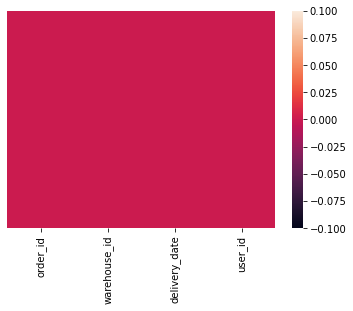

In [144]:
sns.heatmap(orders.isnull(),yticklabels=False)

## Data from Order Products

In [11]:
order_products.sort_values(['order_id','store_product_id'], ascending=False)
order_products.head(3)

,order_id,store_product_id,quantity
0,1781559,15970,1
1,1781559,8426,1
2,1781559,29720,1


In [12]:
print(order_products.shape)
print()
print(order_products.describe())
print()
print(order_products.info())

(540964, 3)

           order_id  store_product_id       quantity
count  5.409640e+05     540964.000000  540964.000000
mean   1.794980e+06      11171.634704       1.190016
std    8.095775e+03       8041.202976       1.190351
min    1.750301e+06          1.000000       0.000000
25%    1.787783e+06       5670.000000       1.000000
50%    1.794996e+06      11536.000000       1.000000
75%    1.802197e+06      14931.000000       1.000000
max    1.808868e+06      41325.000000     300.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540964 entries, 0 to 540963
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   order_id          540964 non-null  int64
 1   store_product_id  540964 non-null  int64
 2   quantity          540964 non-null  int64
dtypes: int64(3)
memory usage: 12.4 MB
None


In [13]:
order_products.isnull().sum()

order_id            0
store_product_id    0
quantity            0
dtype: int64

<AxesSubplot:>

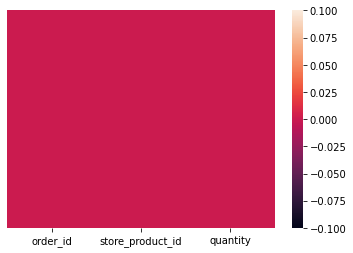

In [147]:
sns.heatmap(order_products.isnull(),yticklabels=False)

## Data from Store Products

In [14]:
store_products.sort_values(['store_product_id','product_id','category'], ascending=False)
store_products.head(3)

,store_product_id,product_id,storage,category
0,1,1,Seco,Aseo
1,2,2,Seco,Aseo
2,3,3,Seco,Aseo


In [15]:
print(store_products.shape)
print()
print(store_products.describe())
print()
print(store_products.info())

(220043, 4)

       store_product_id     product_id
count     220043.000000  220043.000000
mean      296323.832542  245685.245520
std       202437.912801   69505.891852
min            1.000000       0.000000
25%       109014.500000  192249.500000
50%       340879.000000  232944.000000
75%       517053.500000  307519.500000
max       574269.000000  358536.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220043 entries, 0 to 220042
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   store_product_id  220043 non-null  int64 
 1   product_id        220043 non-null  int64 
 2   storage           219994 non-null  object
 3   category          208407 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.7+ MB
None


In [16]:
store_products.isnull().sum()

store_product_id        0
product_id              0
storage                49
category            11636
dtype: int64

<AxesSubplot:>

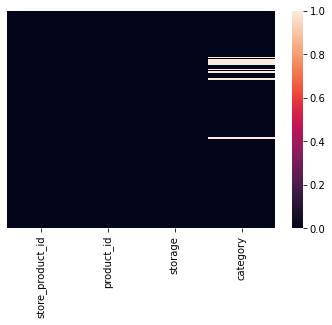

In [146]:
sns.heatmap(store_products.isnull(),yticklabels=False)

## Analysing data from lines without values

In [17]:
shape_before = store_products.shape[0]
shape_now = store_products.dropna().shape[0]
lines_rev = shape_before - shape_now
lines_per = (lines_rev/shape_before) * 100

print(f"Total of lines: {shape_before} Removed lines empty {lines_rev} percent of null: {round(lines_per, 2)}%")


Total of lines: 220043 Removed lines empty 11684 percent of null: 5.31%


In [18]:
# store_products.dropna(inplace=True)
# store_products.shape[0]

In [19]:
# store_products.reset_index(drop=True).head(3)

## Data from Products

In [20]:
products.sort_values(['product_id','product_name'], ascending=False)
products['prod_volcub'] = products['height'] * products['width'] * products['length'] 
products['prod_cubage'] = products['prod_volcub'] * products['weight'] 
products.drop('reference',axis=1, inplace=True)
products.astype({'height':float, 'width':float,	'length':float,	'weight':float}).dtypes
products.head(3)


,product_id,product_name,height,width,length,weight,can_mix,type,prod_volcub,prod_cubage
0,1,Detergente Líquido Fab Floral 1Lt,23.0,13.0,8.0,1108.0,Toilet,Simple,2392.0,2650336.0
1,2,Limpia Pisos Pinol Creso,27.0,10.0,7.0,0.0,Toilet,Simple,1890.0,0.0
2,3,Colada Maizena Sabor Arequipe,1.0,13.0,12.0,33.0,Food,Simple,156.0,5148.0


In [21]:
can_mix = products['can_mix'].unique()
can_mix 

array(['Toilet', 'Food', nan, 'Pets'], dtype=object)

In [22]:
product_name = products['product_name'].drop_duplicates().sort_values()
[name for name in product_name ] 

['#merqueoteregala',
 '*Crema De Avellanas Corina',
 '*Jarabe Sabor Maple Corina',
 '0.77 Violeta',
 '0.88 Verde',
 '1 Mes de Deezer Premium',
 '1 litro de helado de Arequipe + Brownies',
 '1 litro de helado de Arequipe + Conos',
 '1 litro de helado de Arequipe + salsa de Chocolate',
 '1 litro de helado de Arequipe + salsa de Chocolate + Brownies',
 '1 litro de helado de Arequipe + salsa de Chocolate + conos',
 '1 litro de helado de Brownie + Brownies',
 '1 litro de helado de Brownie + Conos',
 '1 litro de helado de Brownie + salsa de Arequipe',
 '1 litro de helado de Brownie + salsa de Arequipe + Brownies',
 '1 litro de helado de Brownie + salsa de Arequipe + conos',
 '1 litro de helado de M&M + Brownies',
 '1 litro de helado de M&M + Conos',
 '1 litro de helado de M&M + salsa de Arequipe',
 '1 litro de helado de M&M + salsa de Arequipe + Brownies',
 '1 litro de helado de M&M + salsa de Arequipe + conos',
 '1 litro de helado de Macadamia + Brownies',
 '1 litro de helado de Macadamia +

In [23]:
print(products.shape)
print()
print(products.describe())
print()
print(products.info())

(104766, 10)

          product_id         height          width         length  \
count  104766.000000  104664.000000  104663.000000  104662.000000   
mean   280999.881546      15.205015      13.945176      10.337089   
std     61765.160025     195.171175     387.399302      28.899994   
min         1.000000       0.000000       0.000000       0.000000   
25%    229206.250000       5.000000       5.000000       4.600000   
50%    297746.500000      10.000000       7.300000       6.200000   
75%    332121.750000      20.000000      15.000000      12.000000   
max    358536.000000   44338.000000   44319.000000    7625.000000   

              weight   prod_volcub   prod_cubage  
count  104766.000000  1.046620e+05  1.046620e+05  
mean      557.042151  1.254523e+06  4.077712e+08  
std      4433.434087  2.829082e+08  8.490008e+10  
min         0.000000  0.000000e+00  0.000000e+00  
25%         4.000000  1.250000e+02  1.500000e+03  
50%       100.000000  6.187500e+02  3.960000e+04  
75%    

In [24]:
products.isnull().sum()

product_id         0
product_name       0
height           102
width            103
length           104
weight             0
can_mix         4474
type               0
prod_volcub      104
prod_cubage      104
dtype: int64

<AxesSubplot:>

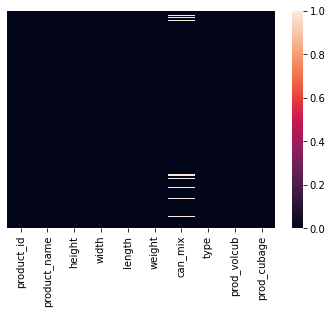

In [145]:
sns.heatmap(products.isnull(),yticklabels=False)

## Analysing data from lines without values

In [25]:
shape_before = products.shape[0]
shape_now = products.dropna().shape[0]
lines_rev = shape_before - shape_now
lines_per = (lines_rev/shape_before) * 100
perc_lines =  100-(shape_now*100/shape_before)

print(f"Total of lines: {shape_before} Removed lines empty {lines_rev} percent of null: {round(lines_per, 2)}%")

Total of lines: 104766 Removed lines empty 4534 percent of null: 4.33%


In [26]:
# products.dropna(inplace=True)
# products.shape[0]

In [27]:
# products.reset_index(drop=True).head(3)

# Creating analysis for result output

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

In [29]:
df = orders.merge(order_products, how='left', on='order_id')

df.head(3)

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity
0,1781559,1,2020-02-01,89718,15970.0,1.0
1,1781559,1,2020-02-01,89718,8426.0,1.0
2,1781559,1,2020-02-01,89718,29720.0,1.0


In [30]:
df = df.merge(store_products, how='left', on='store_product_id')
df.head(3)

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity,product_id,storage,category
0,1781559,1,2020-02-01,89718,15970.0,1.0,181695.0,Refrigerado,Lácteos y derivados
1,1781559,1,2020-02-01,89718,8426.0,1.0,175969.0,Refrigerado,Lácteos y derivados
2,1781559,1,2020-02-01,89718,29720.0,1.0,193713.0,Seco,Abarrotes


In [31]:
df = df.merge(products, how='left', on='product_id')
df.head(3)

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity,product_id,storage,category,product_name,height,width,length,weight,can_mix,type,prod_volcub,prod_cubage
0,1781559,1,2020-02-01,89718,15970.0,1.0,181695.0,Refrigerado,Lácteos y derivados,Yogurt Multisabor Superior 7 Und,22.0,17.0,5.0,1050.0,Food,Simple,1870.000,1963500.0
1,1781559,1,2020-02-01,89718,8426.0,1.0,175969.0,Refrigerado,Lácteos y derivados,Queso Crema Colanta 400 Gr,10.0,8.0,8.0,405.0,Food,Simple,640.000,259200.0
2,1781559,1,2020-02-01,89718,29720.0,1.0,193713.0,Seco,Abarrotes,Margarina En Barra Caja Canola Life 4 Und,13.1,3.8,12.6,125.0,Food,Simple,627.228,78403.5


In [32]:
df2 = df[df['store_product_id'].isnull()]
df2

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity,product_id,storage,category,product_name,height,width,length,weight,can_mix,type,prod_volcub,prod_cubage
130938,1787593,124,2020-02-05,241697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372458,1800210,5,2020-02-11,283824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432973,1803595,6,2020-02-18,134487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.shape

(540246, 18)

In [34]:
df.dropna(inplace=True)
df.shape

(539036, 18)

In [35]:
df['product_id'] = df['product_id'].astype(int)

In [36]:
df['baskets'] = 0
df['cold_bags'] = 0

In [37]:
df.head(5)

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity,product_id,storage,category,product_name,height,width,length,weight,can_mix,type,prod_volcub,prod_cubage,baskets,cold_bags
0,1781559,1,2020-02-01,89718,15970.0,1.0,181695,Refrigerado,Lácteos y derivados,Yogurt Multisabor Superior 7 Und,22.0,17.0,5.0,1050.0,Food,Simple,1870.000,1963500.0,0,0
1,1781559,1,2020-02-01,89718,8426.0,1.0,175969,Refrigerado,Lácteos y derivados,Queso Crema Colanta 400 Gr,10.0,8.0,8.0,405.0,Food,Simple,640.000,259200.0,0,0
2,1781559,1,2020-02-01,89718,29720.0,1.0,193713,Seco,Abarrotes,Margarina En Barra Caja Canola Life 4 Und,13.1,3.8,12.6,125.0,Food,Simple,627.228,78403.5,0,0
3,1781559,1,2020-02-01,89718,20198.0,1.0,184909,Seco,Abarrotes,Panela Panelón Panela Colombia,30.0,27.0,10.0,1900.0,Food,Simple,8100.000,15390000.0,0,0
4,1781559,1,2020-02-01,89718,167.0,1.0,549,Seco,Abarrotes,Curry Badia Sobre,15.0,10.0,1.0,28.0,Food,Simple,150.000,4200.0,0,0


In [38]:
# Selecting order for analysi
df[df['order_id']==1781559]

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity,product_id,storage,category,product_name,height,width,length,weight,can_mix,type,prod_volcub,prod_cubage,baskets,cold_bags
0,1781559,1,2020-02-01,89718,15970.0,1.0,181695,Refrigerado,Lácteos y derivados,Yogurt Multisabor Superior 7 Und,22.0,17.0,5.0,1050.0,Food,Simple,1870.000,1963500.0,0,0
1,1781559,1,2020-02-01,89718,8426.0,1.0,175969,Refrigerado,Lácteos y derivados,Queso Crema Colanta 400 Gr,10.0,8.0,8.0,405.0,Food,Simple,640.000,259200.0,0,0
2,1781559,1,2020-02-01,89718,29720.0,1.0,193713,Seco,Abarrotes,Margarina En Barra Caja Canola Life 4 Und,13.1,3.8,12.6,125.0,Food,Simple,627.228,78403.5,0,0
3,1781559,1,2020-02-01,89718,20198.0,1.0,184909,Seco,Abarrotes,Panela Panelón Panela Colombia,30.0,27.0,10.0,1900.0,Food,Simple,8100.000,15390000.0,0,0
4,1781559,1,2020-02-01,89718,167.0,1.0,549,Seco,Abarrotes,Curry Badia Sobre,15.0,10.0,1.0,28.0,Food,Simple,150.000,4200.0,0,0
5,1781559,1,2020-02-01,89718,12024.0,1.0,179192,Seco,Bebidas calientes y cereales,Granola Riovalle Light,26.0,15.0,9.0,420.0,Food,Simple,3510.000,1474200.0,0,0
6,1781559,1,2020-02-01,89718,10473.0,1.0,178220,Refrigerado,Lácteos y derivados,Arepa Doña Paisa Extradelgada 10 Und,2.0,16.0,17.0,800.0,Food,Simple,544.000,435200.0,0,0
7,1781559,1,2020-02-01,89718,17355.0,1.0,182684,Seco,Lácteos y derivados,Pan Tajado Blanco Artisan 1986,22.0,12.0,9.0,500.0,Food,Simple,2376.000,1188000.0,0,0
8,1781559,1,2020-02-01,89718,4503.0,1.0,174301,Seco,Abarrotes,Arroz Blanco Supremo Tradicional,6.0,25.0,40.0,5000.0,Food,Simple,6000.000,30000000.0,0,0
9,1781559,1,2020-02-01,89718,15437.0,1.0,181300,Refrigerado,Lácteos y derivados,Arepa El Carriel Blanca Tipo Oblea 5 Und,15.0,15.0,35.0,500.0,Food,Simple,7875.000,3937500.0,0,0


* basket -> seco + categoria(food) diferente não pode ser misturado + cubage
* cold_bag -> Refrigerado and Congelado + categoria(food) diferente não pode ser misturado + cubage

In [39]:
# Appling conditions for packing
df['baskets'] = np.where(((df['storage']=='Seco')&(df['can_mix']=='Food')|(df['can_mix']=='Toilet')|(df['can_mix']=='Pets')&(df['prod_cubage'] <= cubage_baskets)), 1, 0)
df['cold_bags'] = np.where(((df['storage']=='Refrigerado')|(df['storage']=='Congelado')&(df['can_mix']=='Food')|(df['can_mix']=='Toilet')|(df['can_mix']=='Pets')&(df['prod_cubage'] <= cubage_coldbag)), 1, 0)


In [40]:
# Selecting data
df[df['order_id']==	1781560]  

,order_id,warehouse_id,delivery_date,user_id,store_product_id,quantity,product_id,storage,category,product_name,height,width,length,weight,can_mix,type,prod_volcub,prod_cubage,baskets,cold_bags
13,1781560,1,2020-02-02,487283,541.0,2.0,1214,Refrigerado,Naturales,Salchicha Ranchera Premium,5.0,18.0,18.0,500.0,Food,Simple,1620.0,810000.0,0,1
14,1781560,1,2020-02-02,487283,5103.0,1.0,174766,Seco,Aseo,Detergente en Polvo Ariel Doble Poder 4Kg,6.0,29.0,41.0,4006.0,Toilet,Simple,7134.0,28578804.0,1,1
15,1781560,1,2020-02-02,487283,879.0,1.0,172897,Refrigerado,Lácteos y derivados,Yogo Yogo Fresa Alpina,5.0,13.0,24.0,1022.0,Food,Simple,1560.0,1594320.0,0,1
16,1781560,1,2020-02-02,487283,880.0,1.0,172898,Refrigerado,Lácteos y derivados,Yogo Yogo Mora Alpina,5.0,13.0,24.0,1022.0,Food,Simple,1560.0,1594320.0,0,1
17,1781560,1,2020-02-02,487283,884.0,2.0,172955,Refrigerado,Lácteos y derivados,Yogo Yogo Melocotón Alpina,5.0,13.0,24.0,1022.0,Food,Simple,1560.0,1594320.0,0,1
18,1781560,1,2020-02-02,487283,1224.0,1.0,173636,Seco,Lácteos y derivados,Gala Bloque Vainilla 10 Und,8.0,11.0,16.0,464.0,Food,Simple,1408.0,653312.0,1,0
19,1781560,1,2020-02-02,487283,680.0,1.0,1353,Refrigerado,Lácteos y derivados,Yogo Yogo Multisabor Alpina 8 Und,5.0,29.0,17.0,1232.0,Food,Simple,2465.0,3036880.0,0,1
20,1781560,1,2020-02-02,487283,351.0,2.0,734,Seco,Lácteos y derivados,Bimbo Marinela Lonchi Mix 5 Und,3.0,13.0,23.0,206.0,Food,Simple,897.0,184782.0,1,0
21,1781560,1,2020-02-02,487283,10414.0,2.0,178184,Seco,Lácteos y derivados,Leche Deslactosada Parmalat Zymil 6 Und,9.0,23.0,40.0,6820.0,Food,Simple,8280.0,56469600.0,1,0
22,1781560,1,2020-02-02,487283,10388.0,1.0,178168,Refrigerado,Lácteos y derivados,Kumis Parmalat,5.0,15.0,21.0,1008.0,Food,Simple,1575.0,1587600.0,0,1


In [41]:
output_result = df[['order_id','baskets','cold_bags']]
output_result = output_result.groupby('order_id').sum()
output_result.loc['Soma'] = [output_result['baskets'].sum(axis=0),output_result['cold_bags'].sum(axis=0)] 
output_result

,baskets,cold_bags
order_id,,
1781559,8,5
1781560,5,7
1781561,8,7
1781562,13,7
1781563,31,17
...,...,...
1808865,8,5
1808866,42,25
1808867,59,21


In [42]:
output_result.to_excel("orders_type_packing.xlsx", sheet_name='type_packing')  

In [63]:
bar_gra = output_result.loc[1781559:1808868]
bar_gra


,baskets,cold_bags
order_id,,
1781559,8,5
1781560,5,7
1781561,8,7
1781562,13,7
1781563,31,17
...,...,...
1808864,27,12
1808865,8,5
1808866,42,25


<AxesSubplot:title={'center':'Quantity of baskets and coldbag per order\n'}, xlabel='order_id'>

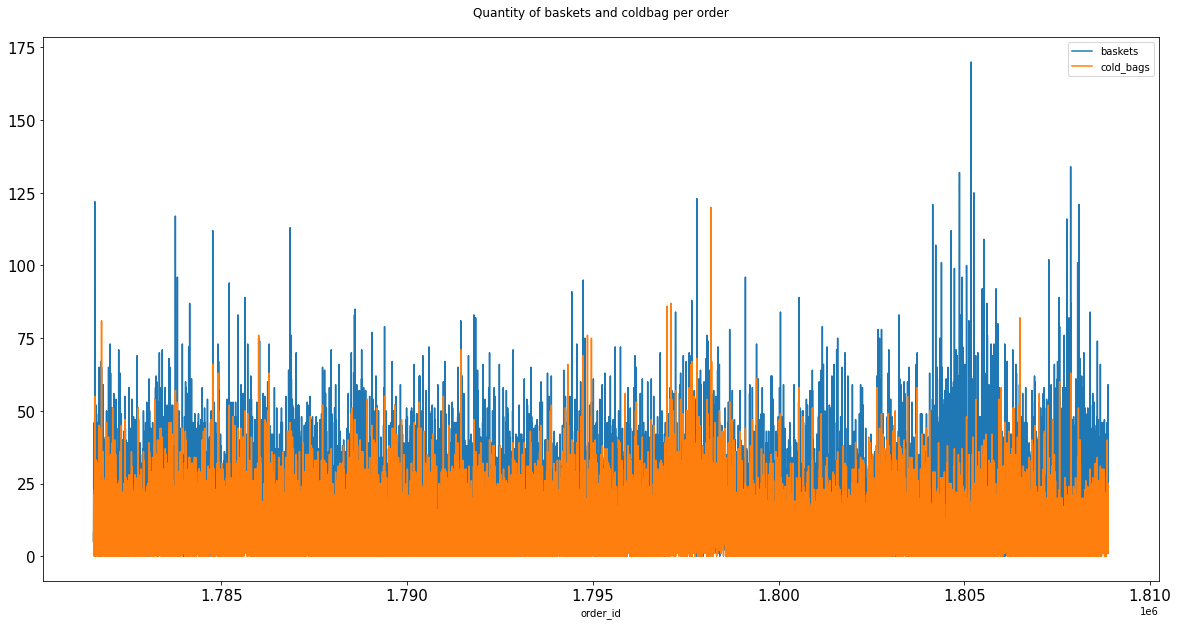

In [79]:
bar_gra.plot(kind='line', figsize=(20,10), title='Quantity of baskets and coldbag per order\n', fontsize=15)

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='baskets', ylabel='count'>

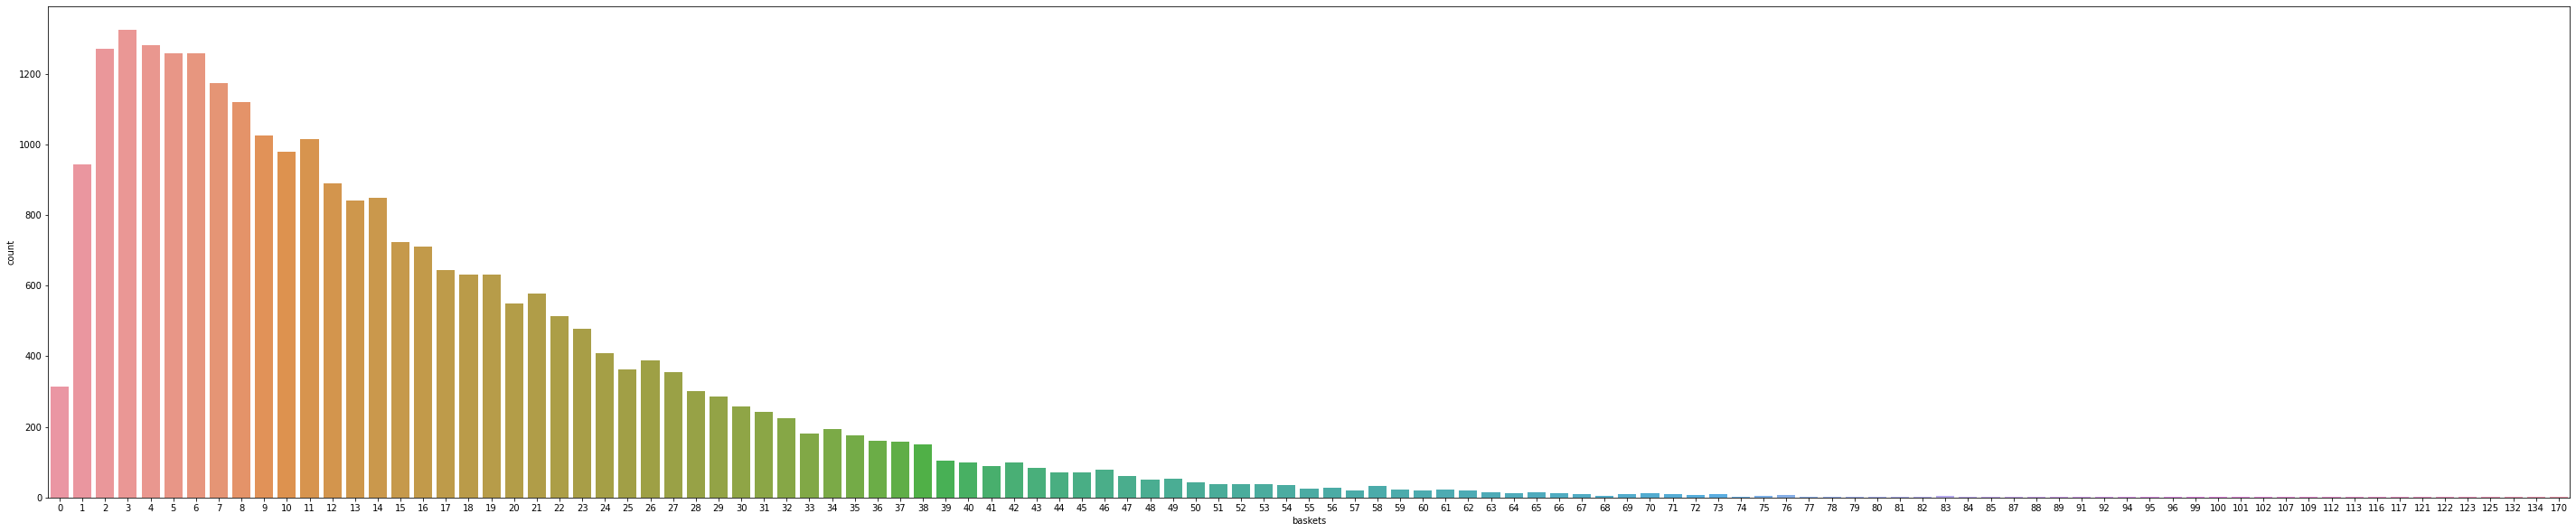

In [154]:
plt.figure(figsize=(50,10))
sns.countplot(bar_gra['baskets'])

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cold_bags', ylabel='count'>

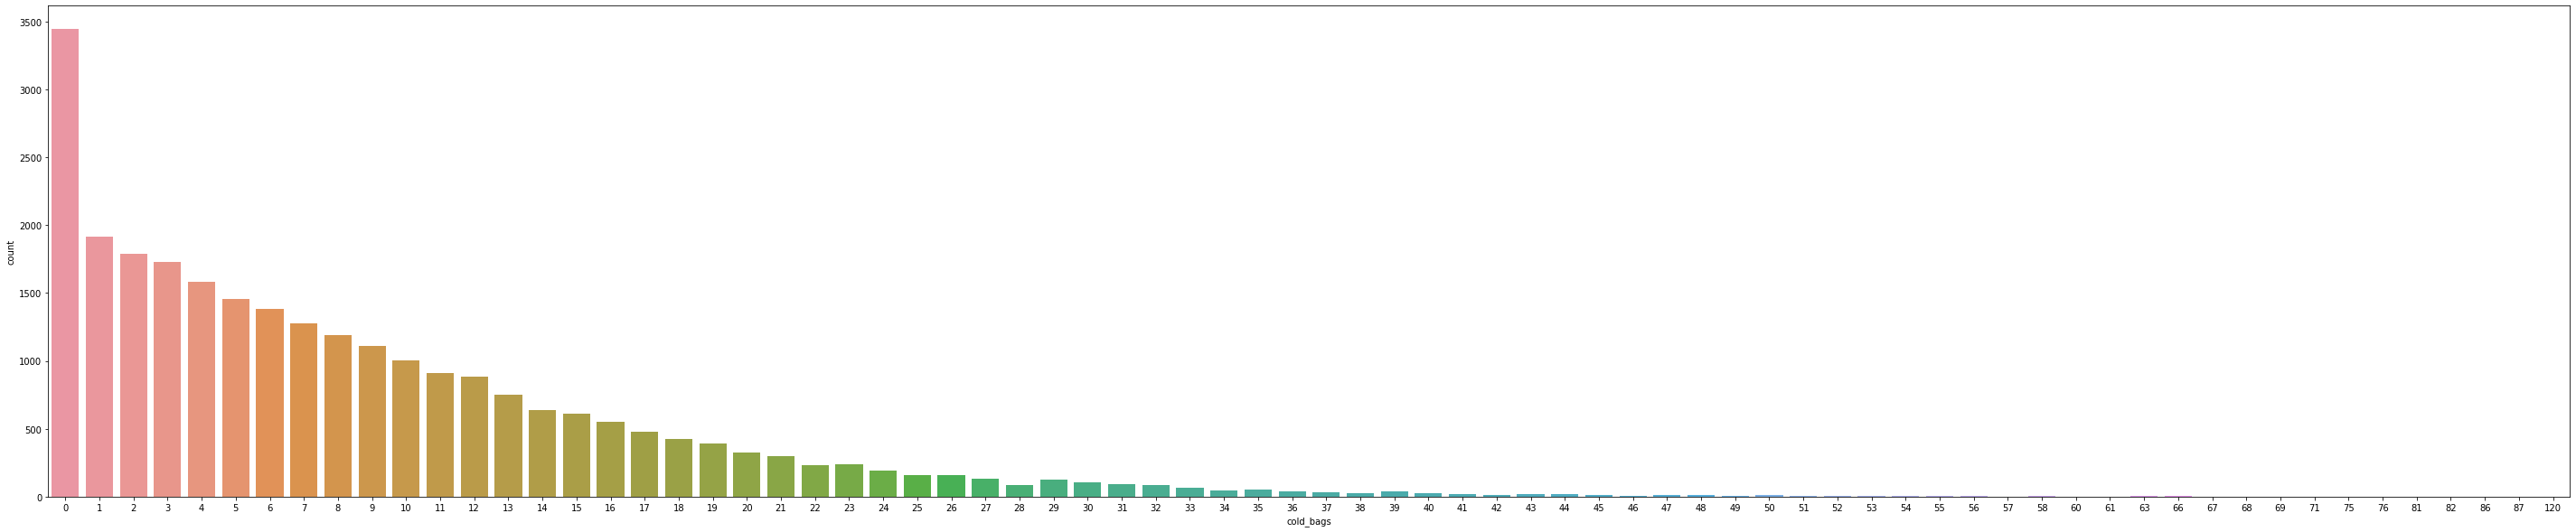

In [156]:
plt.figure(figsize=(50,10))
sns.countplot(bar_gra['cold_bags'])

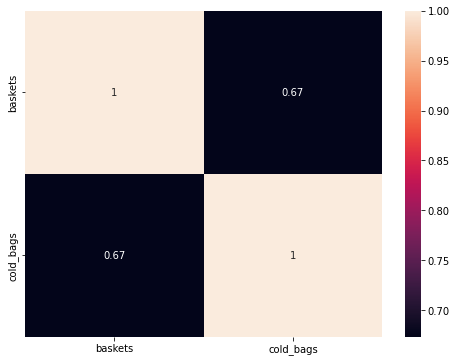

In [84]:
corr_df = bar_gra.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [87]:
prod = df[['product_name', 'height', 'width', 'length', 'weight']]
prod

,product_name,height,width,length,weight
0,Yogurt Multisabor Superior 7 Und,22.0,17.0,5.0,1050.0
1,Queso Crema Colanta 400 Gr,10.0,8.0,8.0,405.0
2,Margarina En Barra Caja Canola Life 4 Und,13.1,3.8,12.6,125.0
3,Panela Panelón Panela Colombia,30.0,27.0,10.0,1900.0
4,Curry Badia Sobre,15.0,10.0,1.0,28.0
...,...,...,...,...,...
540241,Gelatina Gel'hada Light Limón,9.0,10.0,3.0,12.0
540242,Gelatina Gel'hada Light Fresa,9.0,9.5,2.8,12.0
540243,Snacks Lopets Muslos Para Perros,1.0,16.0,20.0,118.0
540244,Queso Campesino Bloque Alpina,3.0,11.0,11.0,254.0


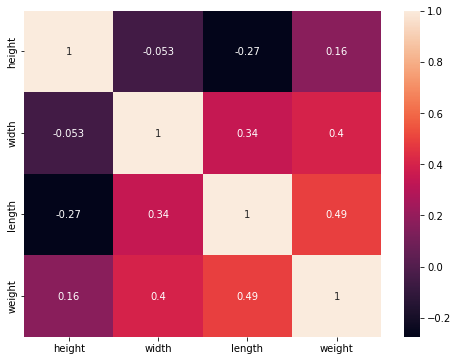

In [88]:
corr_df = prod.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [99]:
orders_id_dt = df[['order_id',	'delivery_date']]
orders_id_dt = orders_id_dt.drop_duplicates().reset_index(drop=True)
orders_id_dt 




,order_id,delivery_date
0,1781559,2020-02-01
1,1781560,2020-02-02
2,1781561,2020-02-02
3,1781562,2020-02-01
4,1781563,2020-02-01
...,...,...
26280,1808864,2020-02-16
26281,1808865,2020-02-18
26282,1808866,2020-02-18
26283,1808867,2020-02-16


In [109]:
delivery_date = orders_id_dt['delivery_date'].value_counts()
delivery_date

2020-02-10    2450
2020-02-09    2346
2020-02-15    2343
2020-02-14    2152
2020-02-03    2035
2020-02-02    1675
2020-02-04    1623
2020-02-11    1509
2020-02-13    1441
2020-02-12    1409
2020-02-05    1359
2020-02-08    1310
2020-02-06    1219
2020-02-07    1188
2020-02-16     814
2020-02-17     366
2020-02-01     324
2020-02-18     211
2020-02-19     183
2020-02-20     105
2020-02-24      35
2020-02-22      33
2020-02-23      32
2020-02-21      30
2020-02-25      21
2020-02-28      19
2020-02-29      15
2020-02-26      14
2020-02-27       9
2020-03-03       4
2020-03-01       3
2020-03-02       2
2020-03-04       2
2020-03-05       1
2020-03-22       1
2020-03-06       1
2020-03-12       1
Name: delivery_date, dtype: int64

<AxesSubplot:title={'center':'Quantity of order per date\n'}>

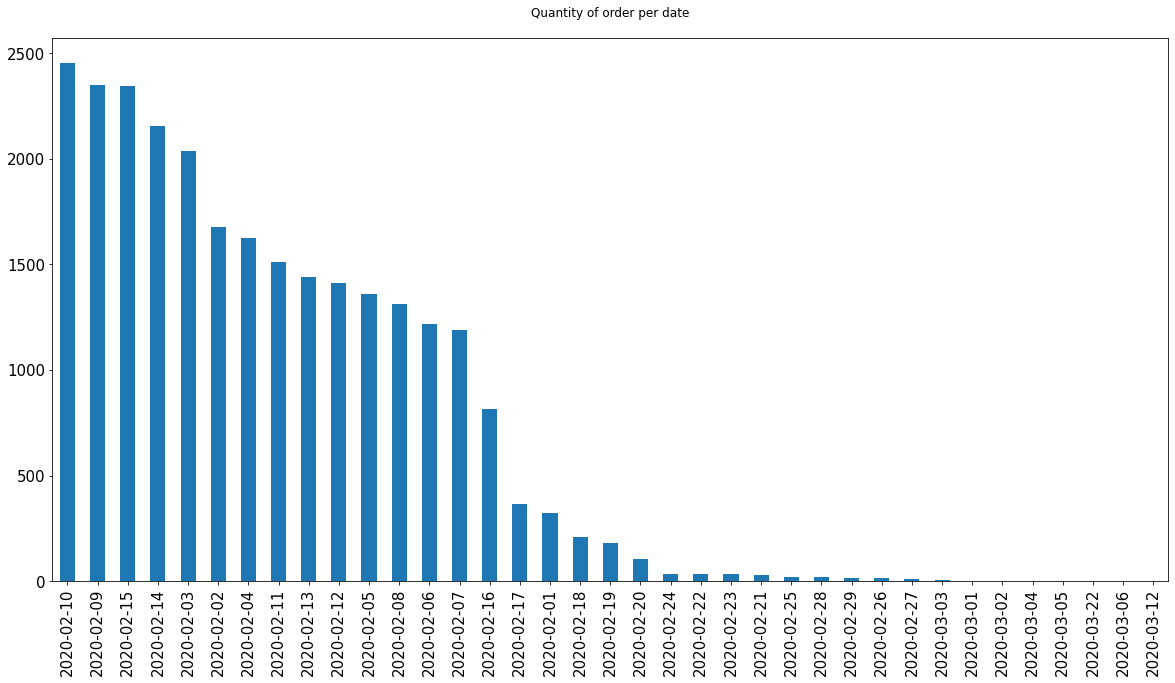

In [136]:
delivery_date.plot(kind='bar', figsize=(20,10), title='Quantity of order per date\n', fontsize=15)